In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all 12 sheets and combine
excel_path = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\\four_vs_station.xlsx'
df = pd.concat(pd.read_excel(excel_path, sheet_name=None), ignore_index=True)

# Convert date properly
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d', errors='coerce')

# Convert numeric columns to float
for col in ['FH', 'T', 'DR', 'RH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by station and hour
hourly_avg = df.groupby(['STN', 'HH']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

sns.set(style="whitegrid")

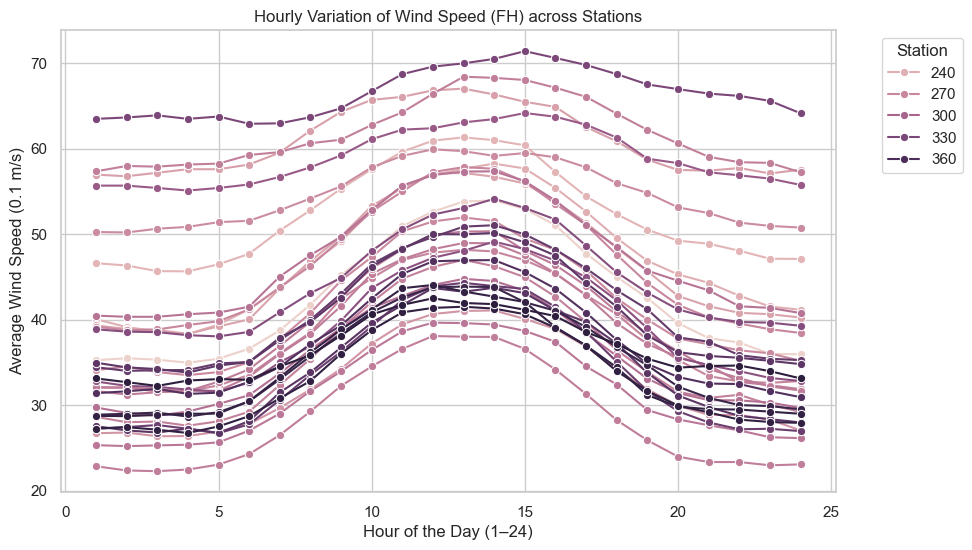

In [ ]:
# Manasa code
# Wind Speed (FH)
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_avg, x='HH', y='FH', hue='STN', marker='o')
plt.title('Hourly Variation of Wind Speed (FH) across Stations')
plt.xlabel('Hour of the Day (1–24)')
plt.ylabel('Average Wind Speed (0.1 m/s)')
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
import json

path_2023 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2023.json'
path_2024 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2024.json'

with open(path_2023, 'r') as file:
    raw_2023 = json.load(file)

with open(path_2024, 'r') as file:
    raw_2024 = json.load(file)

df_2023 = pd.DataFrame(raw_2023)
df_2024 = pd.DataFrame(raw_2024)

df_2023.tail()




,station_code,date,hour,FH,T,DR,RH
39739,391,2023-12-04T00:00:00.000Z,20,50.0,18.0,10.0,11.0
39740,391,2023-12-04T00:00:00.000Z,21,50.0,22.0,10.0,8.0
39741,391,2023-12-04T00:00:00.000Z,22,50.0,26.0,10.0,11.0
39742,391,2023-12-04T00:00:00.000Z,23,40.0,29.0,10.0,6.0
39743,391,2023-12-04T00:00:00.000Z,24,40.0,31.0,8.0,1.0


In [39]:
# Turn 'date' into a datetime object (rather than a string)
df_2023['date'] = pd.to_datetime(df_2023['date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_2023['date'] = df_2023['date'].dt.strftime('%y%m%d')

In [40]:
# Group by station and hour
hourly_avg = df_2023.groupby(['hour']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

df_2023.head()

,station_code,date,hour,FH,T,DR,RH
0,209,231030,1,130.0,NaN,NaN,NaN
1,209,231030,2,120.0,NaN,NaN,NaN
2,209,231030,3,110.0,NaN,NaN,NaN
3,209,231030,4,110.0,NaN,NaN,NaN
4,209,231030,5,110.0,NaN,NaN,NaN
